In [1]:
#from google.colab import drive
import os
os.chdir('..')

In [2]:
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
#!pip install -U giotto-tda
#from gtda.images import ImageToPointCloud

In [1]:
def rotation_2d(theta=0):
    return np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]
    ])


## Loading all images

In [3]:
image_list = []
data_dir = 'interpolation/shapes/'
subset = ['bird2.png', 'cat.png', 'centaur1.png', 'man1.png', 'chicken.gif','device.gif','star5.png', 'heart2.jpg']
subset_files = [data_dir+s for s in subset]
# for filename in glob.glob('./shapes/*'):
#     im=Image.open(filename)
#     image_list.append(im)
for filename in subset_files:
    im=Image.open(filename)
    grey = np.array(im.convert('L'))
    bw = grey.copy()
    bw[grey < 128] = 255   # Black
    bw[grey >= 128] = 0 # White
    image_list.append(bw)

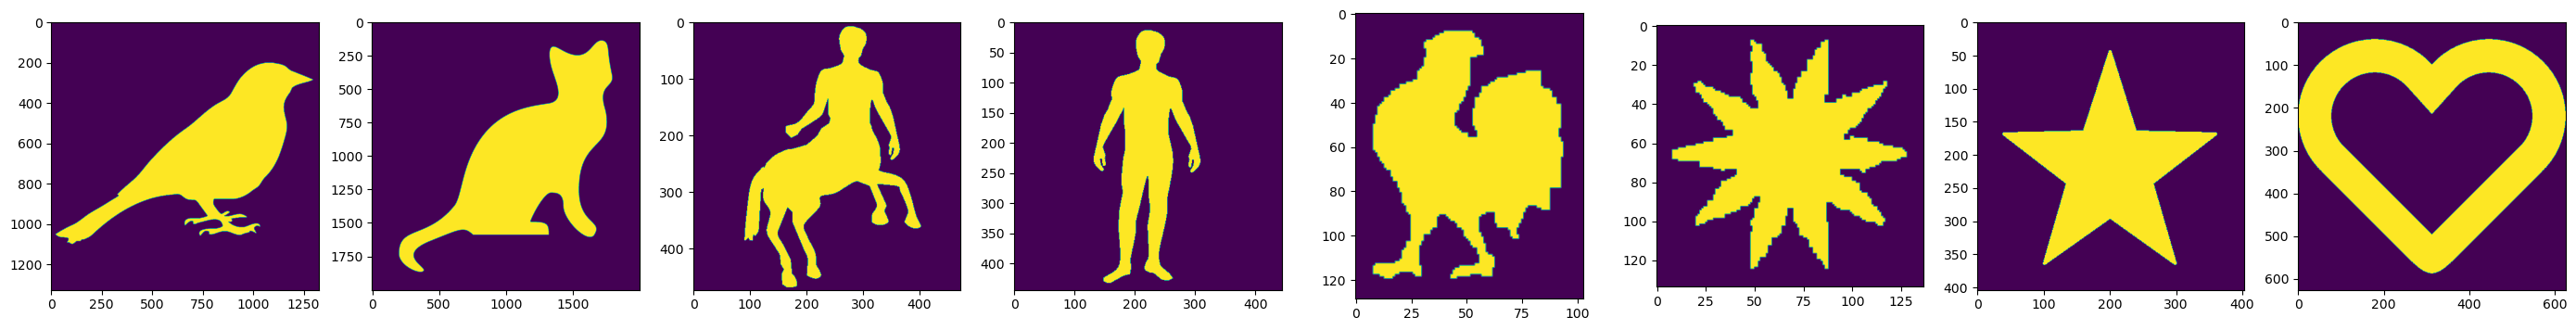

In [4]:
fig, ax = plt.subplots(1, 8, figsize=(35, 4))
for i in range(8):
  ax[i].imshow(image_list[i])

plt.show()

## Generate point cloud from binary images

NameError: name 'ImageToPointCloud' is not defined

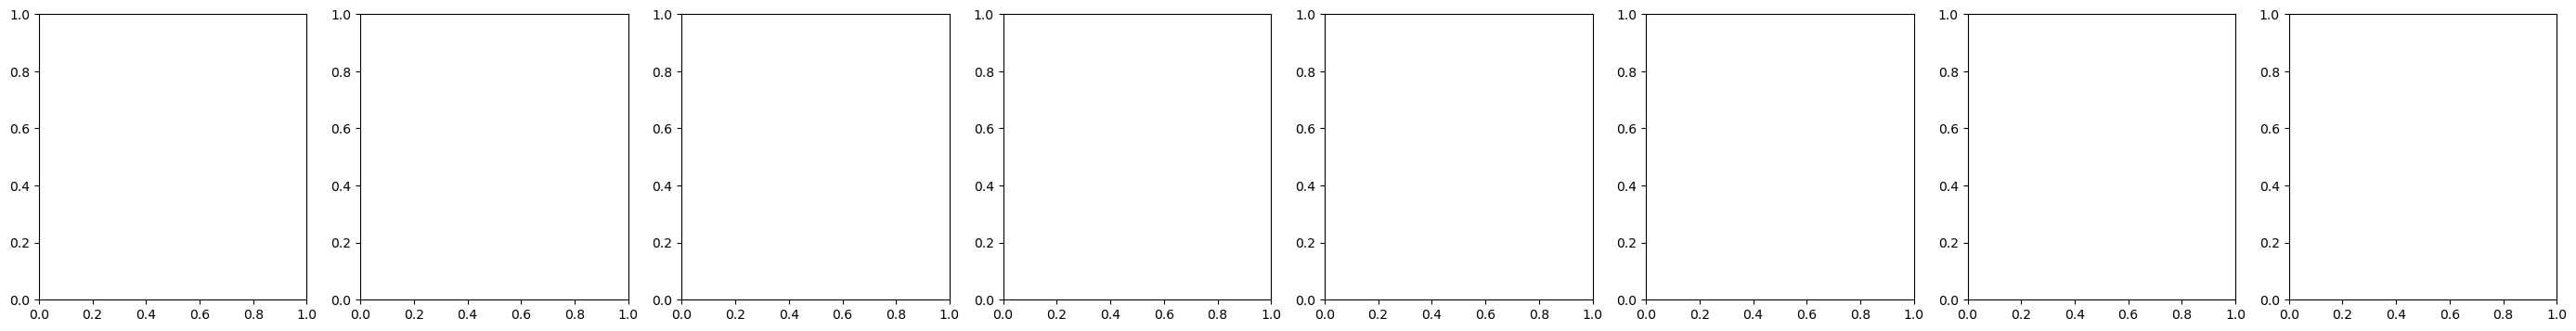

In [9]:
def ImgToPC(img, num_samples):
  img2pc = ImageToPointCloud()
  pc = img2pc.fit_transform(np.array(img)[None, :, :])[0]
  index = np.random.choice(pc.shape[0], num_samples)
  return pc[index]
num_samples = 2000
fig, ax = plt.subplots(1, 8, figsize=(35, 4))
PC_list = []
for i, img in enumerate(image_list):
  pc = ImgToPC(img, num_samples)
  PC_list.append(pc)
  ax[i].scatter(pc[:,0], pc[:,1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=512,n_init=10)
kmeans2 = KMeans(n_clusters=1024,n_init=10) 

PC1_list=[]
PC2_list=[]
for i in range(len(image_list)):
  print('i is',i)
  X = np.argwhere(image_list[i]>0)
  kmeans1.fit(X)
  kmeans2.fit(X)

  PC1 = kmeans1.cluster_centers_
  PC2 = kmeans2.cluster_centers_

  PC1_list.append(PC1)
  PC2_list.append(PC2)
torch.save('PC_list.pt',(PC1_list,PC2_list))

i is 0


## Adding noise to point cloud

In [21]:
# def add_noise(binary_img, pc, eta):
#   num_noise_points = int(pc.shape[0]*eta)
#   background = np.asarray(np.where(binary_img > 128)).T
#   index = np.random.choice(background.shape[0], num_noise_points)
#   noise = background[index]
#   return np.concatenate((pc, noise), axis=0)

def add_uniform_noise(binary_img, pc, eta):
  num_noise_points = int(pc.shape[0]*eta)
  xy_min = [pc[:,0].min()-0.3*binary_img.shape[0], pc[:,1].min()-0.3*binary_img.shape[1]]
  xy_max = [1.5*pc[:,0].max(), 1.5*pc[:,1].max()]
  noise = np.random.uniform(low=xy_min, high=xy_max, size=(num_noise_points,2))
  return np.concatenate((pc, noise), axis=0)

### 5% noise

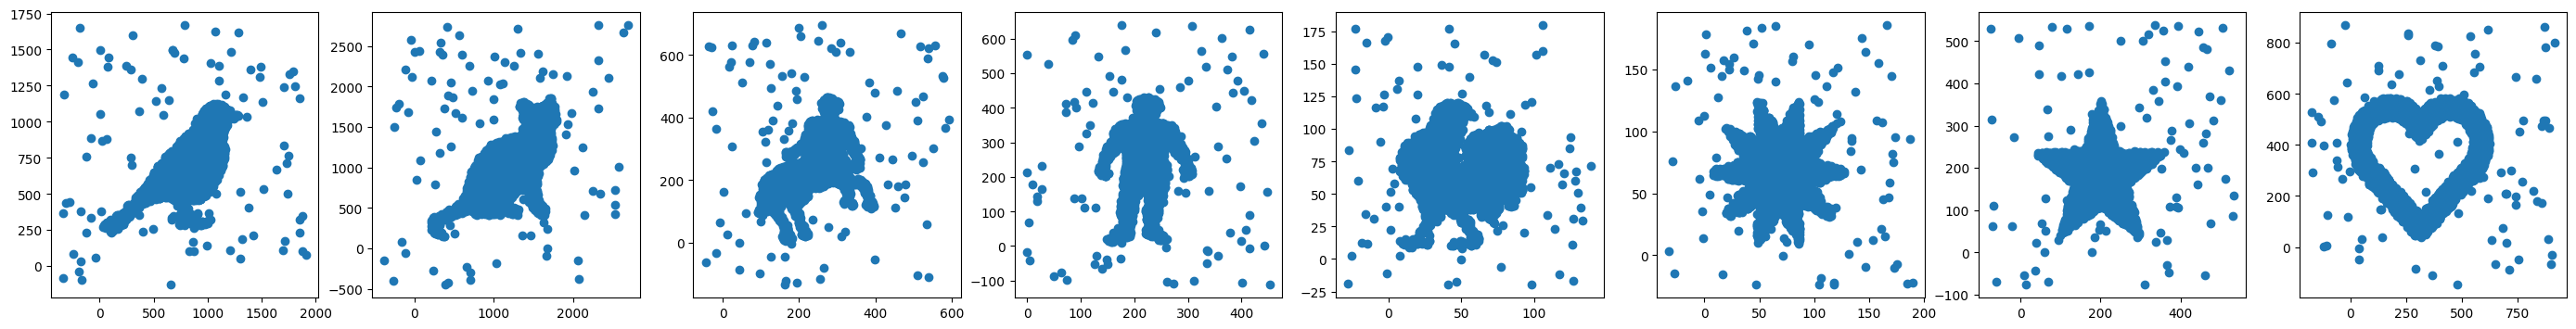

In [22]:
fig, ax = plt.subplots(1, 8, figsize=(35, 4))
noisy_PC_list_0_05 = []
for i, (img, pc) in enumerate(zip(image_list,PC_list)):
  pc_ = add_uniform_noise(img, pc, eta=0.05)
  noisy_PC_list_0_05.append(pc_)
  ax[i].scatter(pc_[:,0], pc_[:,1])
plt.show()

### 10% noise

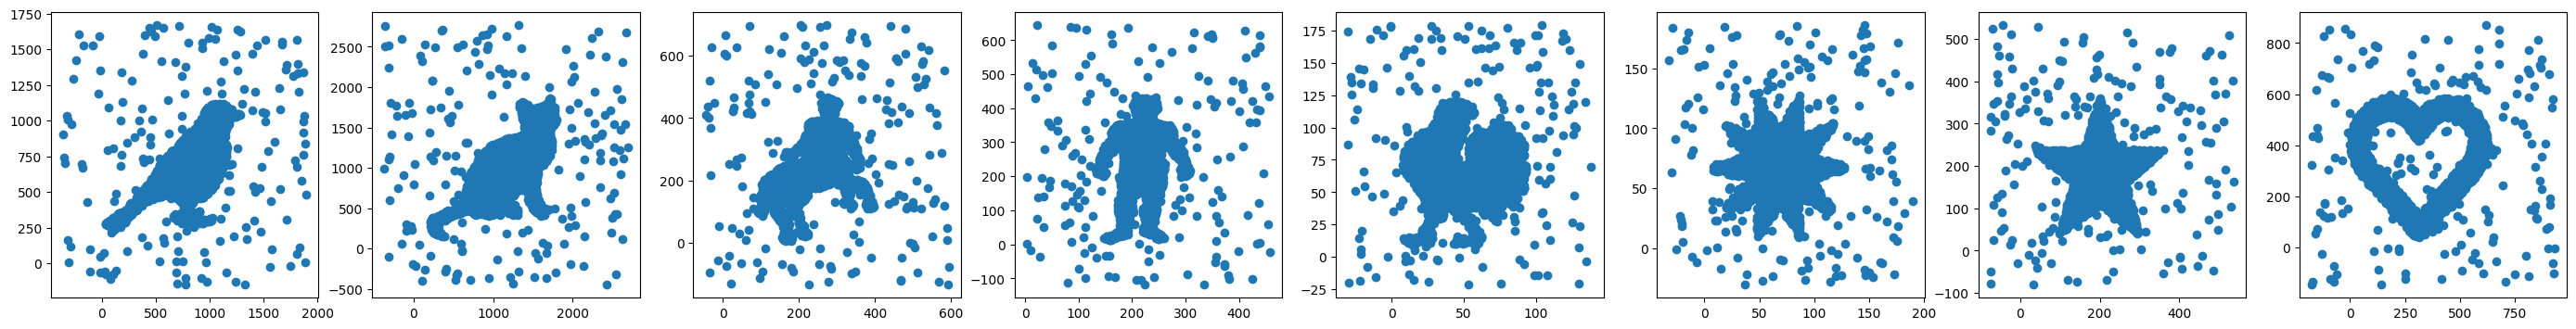

In [23]:
fig, ax = plt.subplots(1, 8, figsize=(35, 4))
noisy_PC_list_0_1 = []
for i, (img, pc) in enumerate(zip(image_list,PC_list)):
  pc_ = add_uniform_noise(img, pc, eta=0.1)
  noisy_PC_list_0_1.append(pc_)
  ax[i].scatter(pc_[:,0], pc_[:,1])
plt.show()

## Saving generated point cloud

In [25]:
np.save('./clean_point_cloud.npy', np.array(PC_list))
np.save('./noise_5%_point_cloud.npy', np.array(noisy_PC_list_0_05))
np.save('./noise_10%_point_cloud.npy', np.array(noisy_PC_list_0_1))

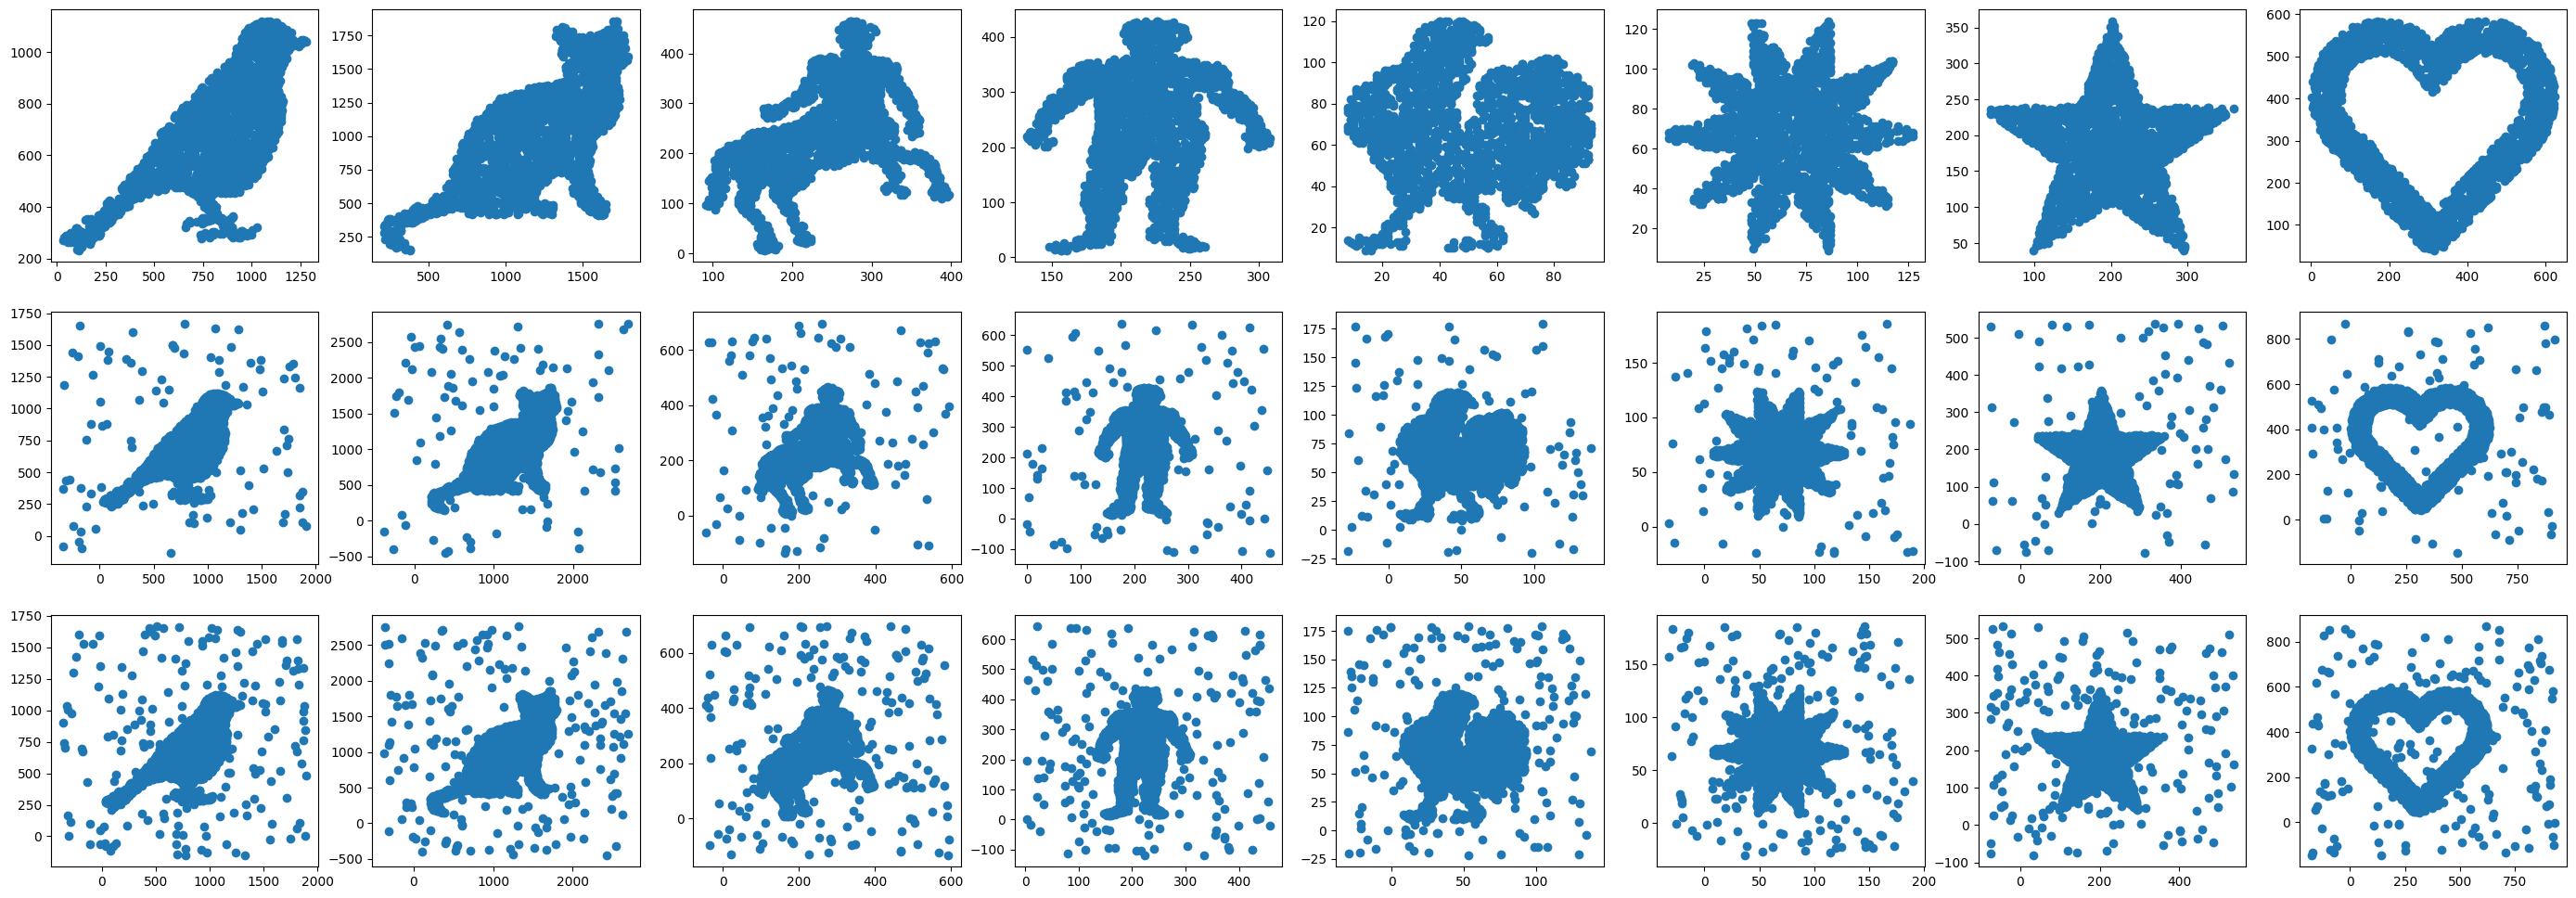

In [27]:
with open('./clean_point_cloud.npy', 'rb') as f1:
    clean = np.load(f1)
with open('./noise_5%_point_cloud.npy', 'rb') as f2:
    noise_5 = np.load(f2)
with open('./noise_10%_point_cloud.npy', 'rb') as f3:
    noise_10 = np.load(f3)
fig, ax = plt.subplots(3, 8, figsize=(35, 12))
for i in range(8):
  ax[0, i].scatter(clean[i][:,0], clean[i][:,1])
  ax[1, i].scatter(noise_5[i][:,0], noise_5[i][:,1])
  ax[2, i].scatter(noise_10[i][:,0], noise_10[i][:,1])
plt.show()

In [ ]:
clean[i]